In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
dflist = pd.read_html('https://en.wikipedia.org/wiki/Transistor_count', header=0, index_col=0) #med html5lib installerat

In [6]:
moore=dflist[0]
type(moore)
moore.head()

,Transistor count,Date of introduction,Designer,Process,Area
Processor,,,,,
TMS 1000,8000,1974[3],Texas Instruments,"8,000 nm",NaN
Intel 4004,2300,1971,Intel,"10,000 nm",12 mm²
Intel 8008,3500,1972,Intel,"10,000 nm",14 mm²
MOS Technology 6502,"3,510[4]",1975,MOS Technology,"8,000 nm",21 mm²
Motorola 6800,4100,1974,Motorola,"6,000 nm",16 mm²


In [7]:
moore['Date of introduction'].head()

Processor
TMS 1000               1974[3]
Intel 4004                1971
Intel 8008                1972
MOS Technology 6502       1975
Motorola 6800             1974
Name: Date of introduction, dtype: object

In [8]:
moore['Year'] = [int(s[0:4]) for s in moore['Date of introduction']]

In [9]:
moore["Transistor count"].head()

Processor
TMS 1000                   8000
Intel 4004                 2300
Intel 8008                 3500
MOS Technology 6502    3,510[4]
Motorola 6800              4100
Name: Transistor count, dtype: object

In [10]:
moore["Transistor count"].str.split('[')

Processor
TMS 1000                                                              [8000]
Intel 4004                                                            [2300]
Intel 8008                                                            [3500]
MOS Technology 6502                                              [3,510, 4]]
Motorola 6800                                                         [4100]
Intel 8080                                                            [4500]
RCA 1802                                                              [5000]
Intel 8085                                                            [6500]
Zilog Z80                                                             [8500]
Motorola 6809                                                         [9000]
Intel 8086                                                           [29000]
Intel 8088                                                           [29000]
WDC 65C02                                                       [1

In [16]:
moore['Transistors'] = [int(s[0].replace(',','')) for s in moore["Transistor count"].str.split('[')]

In [17]:
moore.head()

,Transistor count,Date of introduction,Designer,Process,Area,Year,Transistors
Processor,,,,,,,
TMS 1000,8000,1974[3],Texas Instruments,"8,000 nm",NaN,1974,8000
Intel 4004,2300,1971,Intel,"10,000 nm",12 mm²,1971,2300
Intel 8008,3500,1972,Intel,"10,000 nm",14 mm²,1972,3500
MOS Technology 6502,"3,510[4]",1975,MOS Technology,"8,000 nm",21 mm²,1975,3510
Motorola 6800,4100,1974,Motorola,"6,000 nm",16 mm²,1974,4100


Mer allmän lösning är att använda regular expressions (regex) för att ta bort alla [ ] parenteser

In [ ]:
import re
[re.sub('\[.*\]','',s) for s in moore['Date of introduction']]

In [18]:
moore.dtypes

Transistor count        object
Date of introduction    object
Designer                object
Process                 object
Area                    object
Year                     int64
Transistors              int64
dtype: object

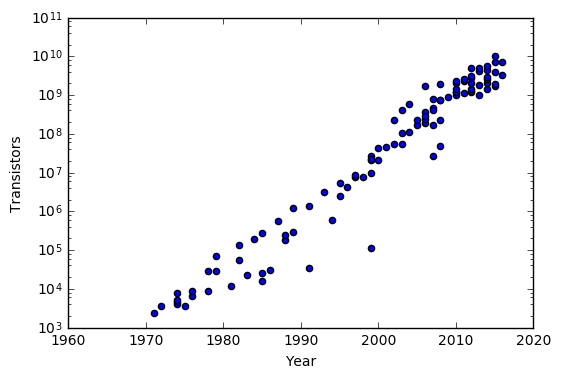

In [19]:
moore.plot(x='Year',y='Transistors',kind='scatter',logy=True)

In [30]:
years = range(1970,2020)
transistors_by_moore = [2300 * 2**((y - 1971)/2.0) for y in years]

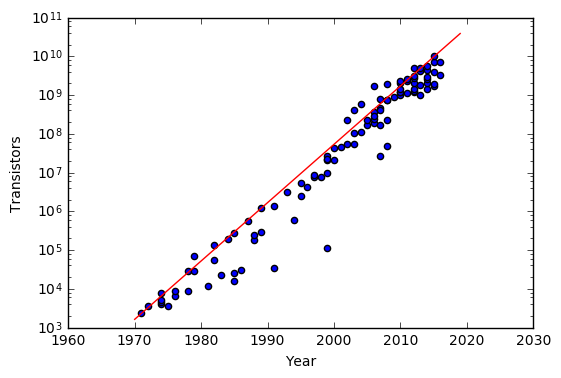

In [32]:
moore.plot(x='Year', y='Transistors', kind='scatter', logy=True)
plt.plot(years, transistors_by_moore,'red')

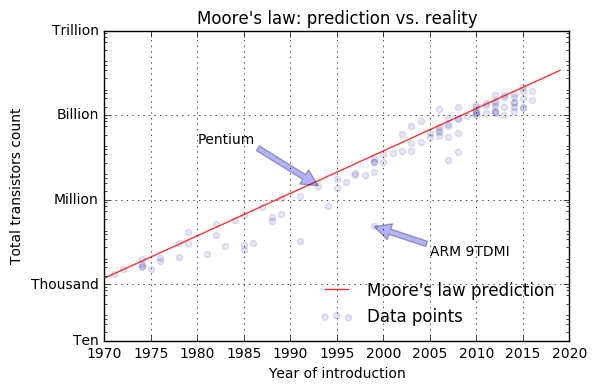

In [36]:
#alpha
moore.plot(x='Year', y='Transistors', kind='scatter', logy=True, alpha=0.1)
plt.plot(years, transistors_by_moore,'red', alpha=0.8)
#xticks
plt.xticks(np.arange(1970,2021,5))
#yticks
plt.yticks([10, 10**3, 10**6, 10**9, 10**12],['Ten', 'Thousand', 'Million', 'Billion', 'Trillion'])
#xlim
plt.xlim([1970, 2020])
#ylim
plt.ylim([10, 10**12])
#grid
plt.grid(True)
#legend
plt.legend(["Moore's law prediction","Data points"],loc=4,frameon=False)
#xlabel
plt.xlabel('Year of introduction')
#ylabel
plt.ylabel('Total transistors count')
#title
plt.title("Moore's law: prediction vs. reality")
#annotate
plt.annotate('Pentium', (moore.ix["Pentium"]["Year"], moore.ix["Pentium"]["Transistors"]), (1980,10**8),arrowprops=dict(alpha=0.3))
plt.annotate('ARM 9TDMI', (moore.ix["ARM 9TDMI"]["Year"], moore.ix["ARM 9TDMI"]["Transistors"]), (2005,10**4),arrowprops=dict(alpha=0.3))


In [37]:
import seaborn as sns

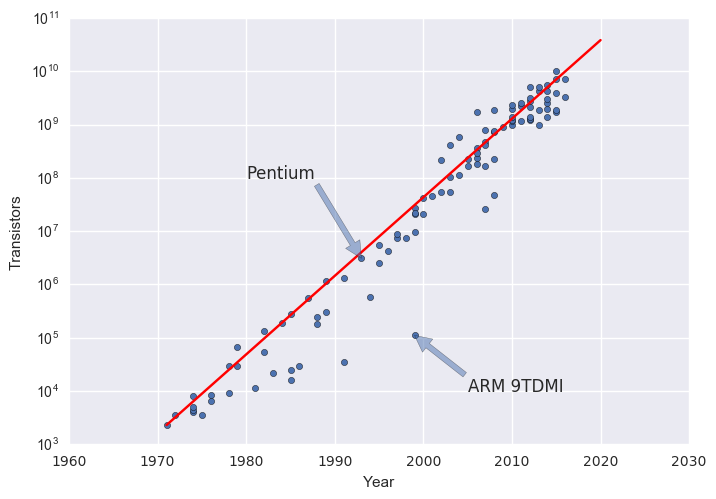

In [38]:
moore.plot(x='Year', y='Transistors', kind='scatter', logy=True)
plt.plot([1971,2020],[2300, 2300 * 2**((2020-1971)/2)],'red')
plt.annotate('Pentium', (moore.ix["Pentium"]["Year"], moore.ix["Pentium"]["Transistors"]), (1980,10**8),arrowprops=dict(alpha=0.5))
plt.annotate('ARM 9TDMI', (moore.ix["ARM 9TDMI"]["Year"], moore.ix["ARM 9TDMI"]["Transistors"]), (2005,10**4),arrowprops=dict(alpha=0.5))

In [39]:
housing = pd.read_csv("housing.data", delim_whitespace=True, names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX',
                                                                    'RM', 'AGE', 'DIS', 'RAD', 'TAX',
                                                                    'PTRATIO', 'B', 'LSTAT', 'MEDV'])

In [40]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [41]:
housing.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [42]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


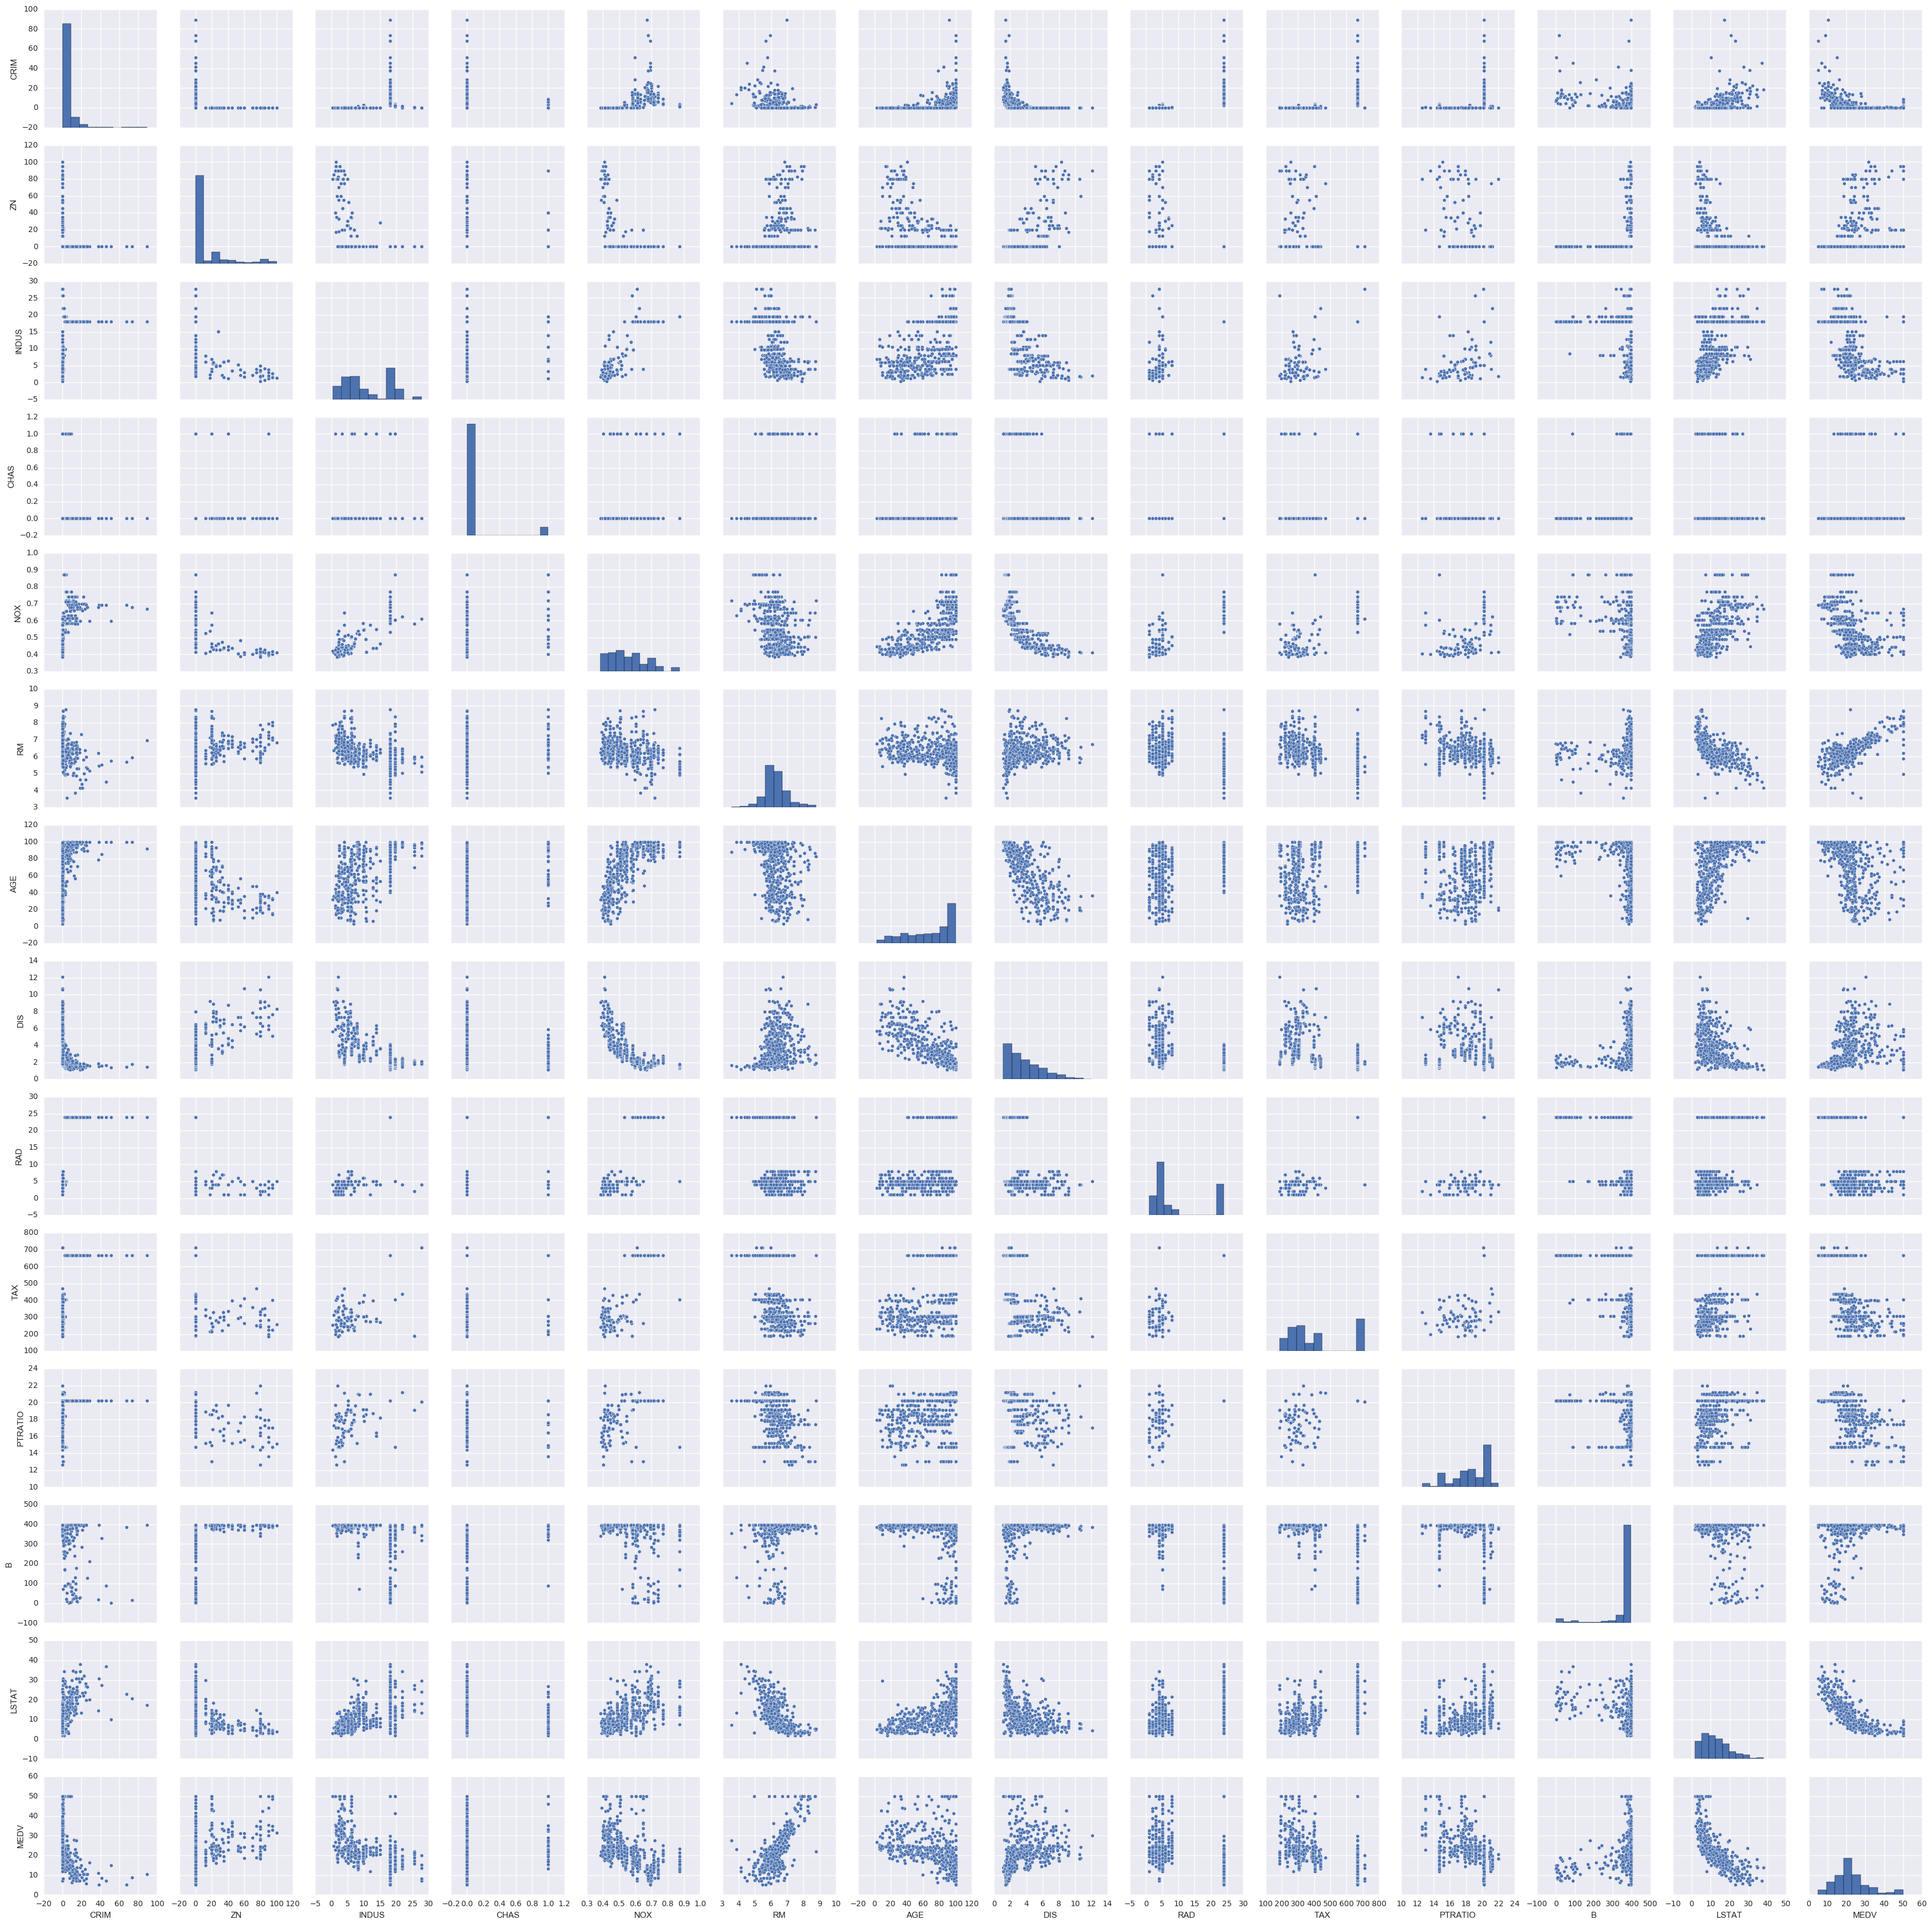

In [43]:
sns.pairplot(housing)

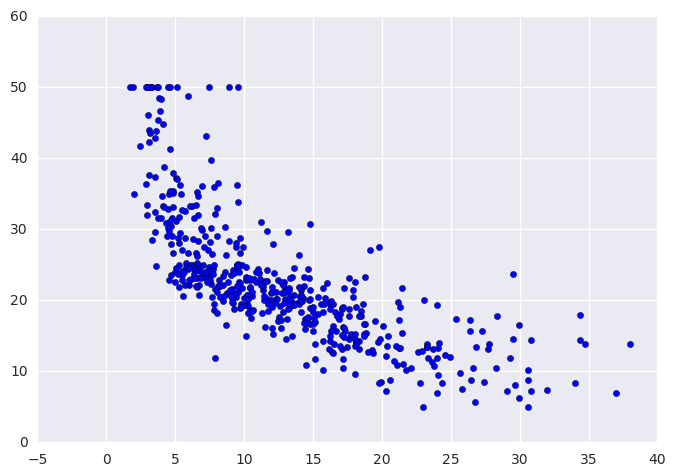

In [62]:
# LSTAT 
plt.scatter(housing.LSTAT, housing.MEDV)

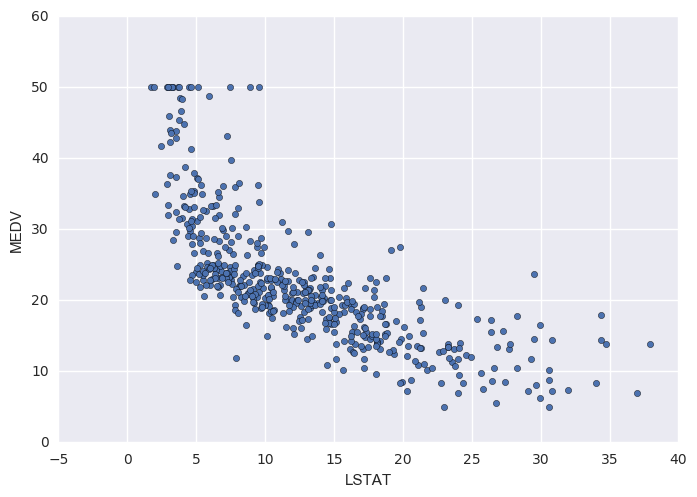

In [65]:
housing.plot("LSTAT","MEDV",kind='scatter')

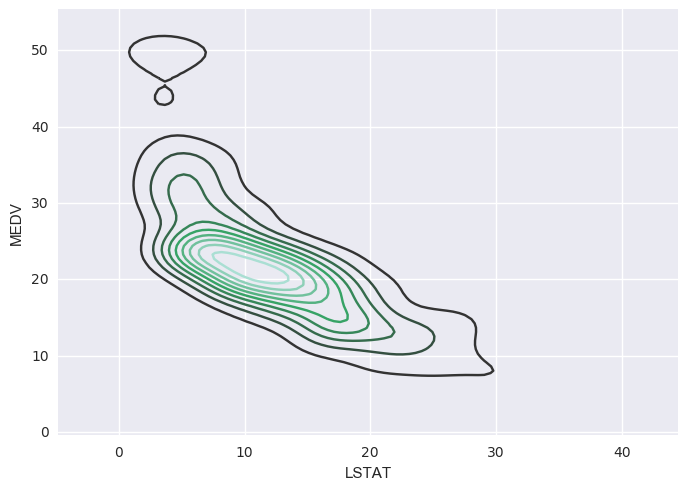

In [66]:
sns.kdeplot(housing.LSTAT, housing.MEDV)

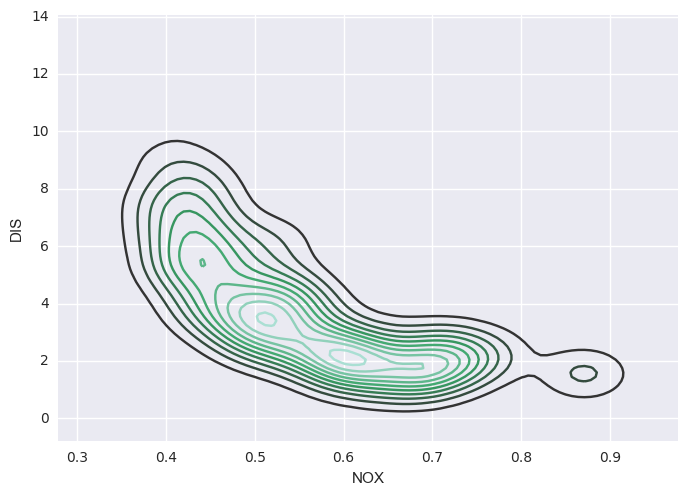

In [68]:
sns.kdeplot(housing.NOX, housing.DIS)

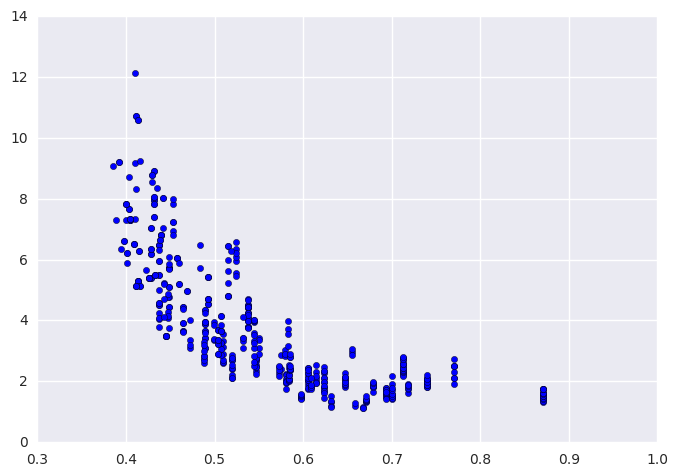

In [67]:
plt.scatter(housing.NOX, housing.DIS)